In [2]:
#Creating tokens

In [22]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text = f.read()

print("The total number of character:",len(raw_text))
print(raw_text[:99])

The total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [23]:
import re

text = "Hello, World. This, is a test."
result = re.split(r'(\s)',text)

print(result)

['Hello,', ' ', 'World.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [24]:
result = re.split(r'([,.::;?!"()\']|--|\s)',text)

print(result)

['Hello', ',', '', ' ', 'World', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [25]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'World', '.', 'This', ',', 'is', 'a', 'test', '.']


In [26]:
import re

text = "Hello, World. Is this -- a test?"
result = re.split(r'(\s)',text)

print(result)

['Hello,', ' ', 'World.', ' ', 'Is', ' ', 'this', ' ', '--', ' ', 'a', ' ', 'test?']


In [27]:
result = re.split(r'([,.::;?!"()\']|--|\s)',text)

print(result)

['Hello', ',', '', ' ', 'World', '.', '', ' ', 'Is', ' ', 'this', ' ', '', '--', '', ' ', 'a', ' ', 'test', '?', '']


In [28]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'World', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [33]:
preprocessed = re.split(r'([,.:;?!)("\']|--|\s)',raw_text)
preprocessed = [item for item in preprocessed if item.strip()]

print(preprocessed[0:99])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter']


In [34]:
print(len(preprocessed))

4654


## Step 2: Creating Token IDs

In [35]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1139


In [36]:
vocab = {token:integer for integer,token in enumerate(all_words)}

In [39]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >=50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry_', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


Token is done! It is the encoder. Lets build the decoder for the mapping of numbers to words!

In [50]:
class SimpleTokenizerV1:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?!)("\']|--|\s)',text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    
    def decode(self,ids):
        text = " ".join(self.int_to_str[i] for i in ids)
        # replace the spaces before the punctuations
        
        text = re.sub(r'\s+([,.:;?!)("\'])', r'\1',text)
        return text

In [51]:
#We are creating a new tokenizer object from the SimpleTokenizerV1 class and using the encoding function to tokenize based on the encoder function.

In [52]:
tokenizer = SimpleTokenizerV1(vocab)

a = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(a)
print(ids)

[1, 56, 2, 859, 997, 612, 544, 756, 5, 1135, 606, 5, 1, 67, 7, 38, 860, 1117, 764, 803, 7]


In [53]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [54]:
#What if the words are not in the list that we created vocabulary?

In [58]:
#text = "Hello, do you like tea?"
#tokenizer.encode(text)
#Hence we need large datasets specially for LLMs
#We can try to implement special context tokens in such cases. We will be implementing SimpleTokenizerV2

In [59]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [60]:
print(len(vocab.items()))

1141


In [61]:
for i,item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1136)
('your', 1137)
('yourself', 1138)
('<|endoftext|>', 1139)
('<|unk|>', 1140)


In [62]:
class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?!)("\']|--|\s)',text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    
    def decode(self,ids):
        text = " ".join(self.int_to_str[i] for i in ids)
        # replace the spaces before the punctuations
        
        text = re.sub(r'\s+([,.:;?!)("\'])', r'\1',text)
        return text

In [68]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1,text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [69]:
tokenizer.encode(text)

[1140, 5, 368, 1135, 638, 984, 10, 1139, 55, 997, 965, 993, 732, 997, 1140, 7]

In [70]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

## BYTE PAIR ENCODING

In [4]:
! pip3 install tiktoken

  Obtaining dependency information for tiktoken from https://files.pythonhosted.org/packages/1e/86/eea2309dc258fb86c7d9b10db536434fc16420feaa3b6113df18b23db7c2/tiktoken-0.8.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/884.5 kB ? eta -:--:--
   ---- ----------------------------------- 92.2/884.5 kB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 501.8/884.5 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 884.5/884.5 kB 8.0 MB/s eta 0:00:00


In [14]:
import importlib
import importlib.metadata
import tiktoken

print("Tiktoken Version: ", importlib.metadata.version("tiktoken"))

Tiktoken Version:  0.8.0


In [10]:
tokenizer = tiktoken.get_encoding("gpt2")

In [12]:
#Tiktoken is a class which helps to implement the byte pair encoding

In [11]:
text = (
"Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special = {"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [13]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


## Creating input target pairs

In [17]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_text = f.read()
    
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [18]:
enc_sample = enc_text[50:]

In [19]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x:{x}")
print(f"y:     {y}")

x:[290, 4920, 2241, 287]
y:     [4920, 2241, 287, 257]


In [20]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    
    print(context,"----->",desired)

[290] -----> 4920
[290, 4920] -----> 2241
[290, 4920, 2241] -----> 287
[290, 4920, 2241, 287] -----> 257


In [22]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    
    print(tokenizer.decode(context),"----->",tokenizer.decode([desired]))

 and ----->  established
 and established ----->  himself
 and established himself ----->  in
 and established himself in ----->  a


# Implement a Data Loader

In [25]:
from torch.utils.data import Dataset,DataLoader

class GPTDataSetV1(Dataset):
    def __init__(self,txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        
        token_ids = tokenizer.encode(txt,allowed_special={"<|endoftext|>"})

        for i in range(0,len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,idx):
        return self.input_ids[idx], self.target_ids[idx]

Step 1: Initialize the tokenizer
Step 2: Create dataset
Step 3: drop_last = True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training
Step 4: The number of CPU processes to use for processing

In [26]:
def create_dataloader_v1(
    txt, batch_size = 4, max_length = 256, stride = 128, 
    shuffle = True, drop_last = True, num_workers = 0):
    
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset =  GPTDataSetV1(txt, tokenizer, max_length, stride)
    
    dataloader = DataLoader(
    dataset,
    batch_size = batch_size,
    shuffle = shuffle, 
    drop_last = drop_last, 
    num_workers = num_workers
    )
    
    return dataloader

In [27]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_text = f.read()

In [28]:
import torch
print("Python version:", torch.__version__)
dataloader = create_dataloader_v1(
raw_text,batch_size = 1, max_length = 4, stride = 1, shuffle = False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

Python version: 2.2.2
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [10]:
#Lets try to understand the stride. When we print the next iteration, try to see the movement of numbers.

In [12]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [13]:
dataloader = create_dataloader_v1(
    raw_text, batch_size = 8, max_length = 4, stride = 4, shuffle = False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## Create token embeddings

In [1]:
 pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.18.5 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for simpful==2.12.0 from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.


## Train a dummy model for vector embeddings from a pre trained data set from google

In [5]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300") # download the model and return as object ready for use

In [6]:
word_vectors = model

In [7]:
# Example of using most_similar

print(word_vectors.most_similar(positive=['king','woman'], negative=['man'], topn = 10))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]


# Creating token embeddings

In [16]:
input_ids = torch.tensor([2,3,5,1])

In [17]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size,output_dim)

In [19]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [21]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [22]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


# Positional Embeddings

In [23]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size,output_dim)

In [30]:
max_length = 4

dataloader = create_dataloader_v1(
raw_text, batch_size = 8, max_length = max_length,
stride = max_length, shuffle = False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [31]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [32]:
token_embeddings = token_embedding_layer(inputs)

print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [33]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [35]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [36]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


## Implementing a simplified attention mechanism

In [1]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # Your
     [0.55, 0.87, 0.66],  # Journey
     [0.57, 0.85, 0.64],  # starts
     [0.22, 0.58, 0.33],  # with
     [0.77, 0.25, 0.10],  # one
     [0.05, 0.80, 0.55]]  # step
)

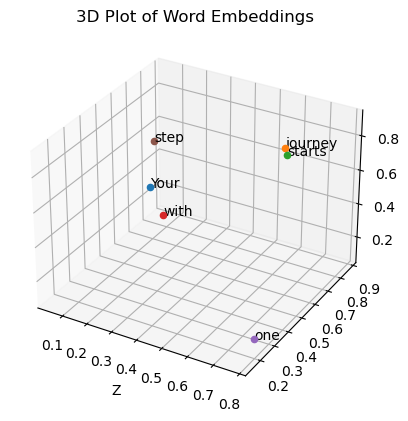

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding word
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Plot each point and annotate with corresponding word

for x,y,z,word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize = 10)
    
# Set lables for axes
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_xlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

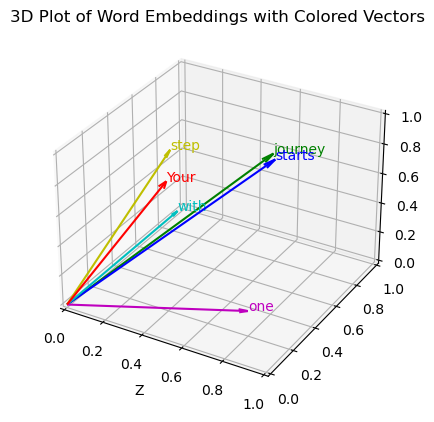

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

colors = ['r','g','b','c','m','y']

for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color = color, arrow_length_ratio = 0.05)
    ax.text(x, y, z, word, fontsize = 10, color = color)
    
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_xlabel('Z')

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [7]:
query = inputs[1]  #2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) #dot product
    
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [8]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
    
print("Attention weights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

Attention weights:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


In [9]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim = 0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [10]:
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)

print("Attention weights: ", attn_weights_2)
print("Sum: ", attn_weights_2.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [11]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)

for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i
    
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [12]:
attn_scores = torch.empty(6,6)

for i,x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)
        
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [13]:
# Two for loops are not computationally feasible

In [14]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [16]:
attn_weights = torch.softmax(attn_scores, dim = -1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [17]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [19]:
print("previous 2nd context vector: ",context_vec_2) 

previous 2nd context vector:  tensor([0.4419, 0.6515, 0.5683])


# Implementing self attention with trainable weights

In [3]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # Your
     [0.55, 0.87, 0.66],  # Journey
     [0.57, 0.85, 0.64],  # starts
     [0.22, 0.58, 0.33],  # with
     [0.77, 0.25, 0.10],  # one
     [0.05, 0.80, 0.55]]  # step
)

In [4]:
x_2 = inputs[1] #The 2nd input element
d_in = inputs.shape[1] #The input embedding size, d = 3
d_out = 2 # The output embedding size, d_out = 2

In [5]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad = False)
W_key = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad = False)
W_value = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad = False)

In [6]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [7]:
print(W_key)

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])


In [8]:
print(W_value)

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [9]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


In [10]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query

print("keys.shape:", keys.shape)

print("Values.shape:",values.shape)

print("Queries.shape:",queries.shape)

keys.shape: torch.Size([6, 2])
Values.shape: torch.Size([6, 2])
Queries.shape: torch.Size([6, 2])


In [11]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [12]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [13]:
attn_scores = queries @keys.T
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [14]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim = -1)
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [15]:
d_k = keys.shape[-1]
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim = -1)
print(attn_weights)
print(d_k)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
2


In [16]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


# Implementing a compact self attention python class

In [17]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
            super().__init__()
            self.W_query = nn.Parameter(torch.rand(d_in, d_out))
            self.W_key = nn.Parameter(torch.rand(d_in, d_out))
            self.W_value = nn.Parameter(torch.rand(d_in, d_out))
            
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax( 
            attn_scores / keys.shape[-1]**0.5, dim = -1
        )

        context_vec = attn_weights @ values

        return context_vec

In [18]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [19]:
import torch.nn as nn

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
            
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax( 
            attn_scores / keys.shape[-1]**0.5, dim = -1
        )

        context_vec = attn_weights @ values

        return context_vec

In [20]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


# Hiding future words with causal attention 

In [21]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys. shape[-1]**0.5, dim = 1)

print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [22]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [23]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [24]:
row_sums = masked_simple.sum(dim = 1, keepdim = True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [25]:
print(attn_scores)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)


In [29]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal = 1)
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)
print(mask)
print(masked)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [30]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim = 1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


# Masking additional weights with dropout

In [31]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [32]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


# Implementing a causal attention class

In [33]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # Your
     [0.55, 0.87, 0.66],  # Journey
     [0.57, 0.85, 0.64],  # starts
     [0.22, 0.58, 0.33],  # with
     [0.77, 0.25, 0.10],  # one
     [0.05, 0.80, 0.55]]  # step
)

batch = torch.stack((inputs, inputs), dim = 0)
print(batch.shape)

torch.Size([2, 6, 3])


In [35]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal = 1))
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.transpose(1,2)
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim = -1)
        
        attn_weights = self.dropout(attn_weights)
        
        context_vec = attn_weights @ values
        return context_vec

In [36]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)

print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [37]:
print(context_vecs)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


# Extending Single Head Attention to Multi-Head Attention

In [42]:
class MultiHeadAttentionWrapper(nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
            for _ in range(num_heads)]
        )
        
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim = -1)

In [43]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # Your
     [0.55, 0.87, 0.66],  # Journey
     [0.57, 0.85, 0.64],  # starts
     [0.22, 0.58, 0.33],  # with
     [0.77, 0.25, 0.10],  # one
     [0.05, 0.80, 0.55]]  # step
)

batch = torch.stack((inputs, inputs), dim = 0)
print(batch.shape)

torch.Size([2, 6, 3])


In [44]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads = 2)

context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape: ", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape:  torch.Size([2, 6, 4])


# Implementing multi-head attention with weight splits

In [15]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        assert (d_out % num_heads == 0)
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match the desired output dimension
        
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                      diagonal = 1)
        )
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        #Unroll last dimension: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1,2)
        values = values.transpose(1,2)
        queries = queries.transpose(1,2)

        attn_scores = queries @ keys.transpose(2,3)

        mask_bool = self.mask.bool()[:num_tokens,:num_tokens]

        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)

        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1,2)

        #flatten each token output into each row

        context_vec = context_vec.contiguous().view(b,num_tokens,self.d_out)
        context_vec = self.out_proj(context_vec)

        return(context_vec)

In [16]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]
)

batch = torch.stack((inputs, inputs), dim = 0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads = 2)
context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[-0.1278,  0.1240,  0.1158,  0.1971,  0.3725,  0.2852],
         [-0.2074,  0.2219,  0.1697,  0.0817,  0.4953,  0.3154],
         [-0.2315,  0.1924,  0.1924,  0.0981,  0.4259,  0.2252]],

        [[-0.1278,  0.1240,  0.1158,  0.1971,  0.3725,  0.2852],
         [-0.2074,  0.2219,  0.1697,  0.0817,  0.4953,  0.3154],
         [-0.2315,  0.1924,  0.1924,  0.0981,  0.4259,  0.2252]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])


# Implementing a GPT Model from scratch to generate text

In [58]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS

In [59]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias = False
        )
    
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device))
        
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
    
    def forward(self, x):
        return x

class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps = 1e-5):
        super().__init__()
        
    def forward(self, x):
        return x


# STEP 1: Tokenization

In [60]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))

batch = torch.stack(batch, dim = 0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


# STEP 2: Creating an instance of a dummyGPT model

In [61]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)

print("Output shape: ", logits.shape)
print(logits)

Output shape:  torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


# GPT Architecture part 2: Layer Normalization

In [62]:
torch.manual_seed(123)
batch_example = torch.randn(2,5)
layer = nn.Sequential(nn.Linear(5,6),nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [63]:
mean = out.mean(dim = -1, keepdim = True)
var = out.var(dim = -1, keepdim = True)
print("Mean:\n",mean)
print("Variance:\n",var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [64]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim = -1, keepdim = True)
var = out_norm.var(dim = -1, keepdim = True)

print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [65]:
torch.set_printoptions(sci_mode = False)

print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [66]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
        
    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True)
        var = x.var(dim = -1, keepdim = True, unbiased = False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [67]:
print(batch_example)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])


In [68]:
#Creating an instance of the layer normalization class

ln = LayerNorm(emb_dim = 5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim = -1, keepdim = True)
var = out_ln.var(dim = -1, unbiased = False, keepdim = True)

print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


# GPT Architecture Part 3: FeedForward Neural network with GELU

In [69]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2 / torch.pi)) *
            (x + 0.044715 * torch.pow(x,3))
        ))

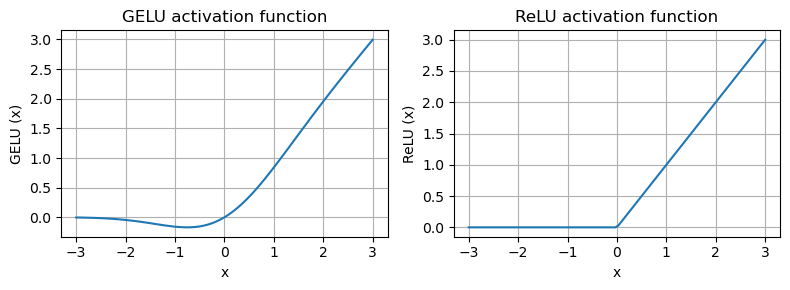

In [70]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize = (8, 3))

for i, (y,label) in enumerate(zip([y_gelu, y_relu],["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label} (x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [71]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )
    
    def forward(self, x):
        return self.layers(x)

In [72]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


# GPT ARCHITECTURE PART 4: SHORTCUT CONNECTIONS

In [73]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])
        
    def forward(self, x):
        for layer in self.layers:
            
            layer_output = layer(x)
            
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x
    

In [74]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut = False)

In [75]:
def print_gradients(model, x):
    
    output = model(x)
    target = torch.tensor([[0.]])
    
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    loss.backward()
    
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [76]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041653171182
layers.3.0.weight has gradient mean of 0.001398873864673078
layers.4.0.weight has gradient mean of 0.005049646366387606


In [77]:
torch.manual_seed(123)

model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut = True)

print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694106817245483
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732502937317
layers.4.0.weight has gradient mean of 1.3258541822433472


# GPT Architecture Part 5: Coding attention and Linear Layers
# Start Here

In [11]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# The building blocks: Layer Normalization, GELU and Feed Forward Neural Network

In [12]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
        
    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True)
        var = x.var(dim = -1, keepdim = True, unbiased = False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2 / torch.pi)) *
            (x + 0.044715 * torch.pow(x,3))
        ))
    
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )
    
    def forward(self, x):
        return self.layers(x)

In [13]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out = cfg["emb_dim"],
            context_length = cfg["context_length"],
            num_heads = cfg["n_heads"],
            dropout = cfg["drop_rate"],
            qkv_bias = cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])
        
    def forward(self, x):
        
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        
        return x

In [15]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        assert (d_out % num_heads == 0)
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match the desired output dimension
        
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                      diagonal = 1)
        )
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        #Unroll last dimension: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1,2)
        values = values.transpose(1,2)
        queries = queries.transpose(1,2)

        attn_scores = queries @ keys.transpose(2,3)

        mask_bool = self.mask.bool()[:num_tokens,:num_tokens]

        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)

        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1,2)

        #flatten each token output into each row

        context_vec = context_vec.contiguous().view(b,num_tokens,self.d_out)
        context_vec = self.out_proj(context_vec)

        return(context_vec)

In [16]:
torch.manual_seed(123)

x = torch.rand(2,4,768)
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)

print("Input Shape: ",x.shape)
print("Output Shape: ",output.shape)

Input Shape:  torch.Size([2, 4, 768])
Output Shape:  torch.Size([2, 4, 768])


# GPT ARCHITECTURE PART 6: FINAL GPT 

In [17]:
import torch
import torch.nn as nn

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias = False
        )
    
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device))
        
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [18]:
torch.manual_seed(123)
print(batch.shape)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)

print("Input Shape:\n",batch)
print("Output Shape:\n",out.shape)
print(out)

torch.Size([2, 4])
Input Shape:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])
Output Shape:
 torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


In [19]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))

batch = torch.stack(batch, dim = 0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [20]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [21]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:",model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [22]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight typing: {total_params_gpt2:,}")

Number of trainable parameters considering weight typing: 124,412,160


In [23]:
total_size_bytes = total_params * 4
total_size_mb = total_size_bytes / (1024*1024)
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


# GPT Architecture Part 7: Generating Text From Output Tokens

In [24]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    for _ in range(max_new_tokens):
        idx_cond = idx[:,-context_size:]
        
        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]  #Extract last vector

        probas = torch.softmax(logits, dim = -1)  #Converting into probabilities by using softmax
        
        idx_next = torch.argmax(probas, dim = -1, keepdim = True)
        
        idx = torch.cat((idx, idx_next), dim = 1)
        
    return idx

In [25]:
start_context = "Hello, I am "
encoded = tokenizer.encode(start_context)

print("Encoded: ", encoded)

encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encoded_tensor.shape:", encoded_tensor.shape)

Encoded:  [15496, 11, 314, 716, 220]
encoded_tensor.shape: torch.Size([1, 5])


In [26]:
model.eval()
model = GPTModel(GPT_CONFIG_124M)
out = generate_text_simple(
model = model,
idx = encoded_tensor,
max_new_tokens = 6,
context_size = GPT_CONFIG_124M["context_length"])
print("Output: ", out)
print("Output Length: ", len(out[0]))

Output:  tensor([[15496,    11,   314,   716,   220,  9421, 28632, 16173, 26186, 28052,
         10766]])
Output Length:  11


In [27]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am  vertBuffer interpretedopa steals Deep


In [28]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();

In [29]:
import tiktoken

def text_to_token_ids(text,tokenizer):
    encoded = tokenizer.encode(text, allowed_special = {'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model = model,
    idx = text_to_token_ids(start_context, tokenizer),
    max_new_tokens = 10,
    context_size = GPT_CONFIG_124M["context_length"]
)

print("Output Text: \n", token_ids_to_text(token_ids, tokenizer))

Output Text: 
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


# Calculating the text generation loss: cross-entropy and perplexity

In [30]:
inputs = torch.tensor([[16833, 3626, 6100],   #["every effort moves"
                      [40, 1107, 588]])       #"I really like"]

targets = torch.tensor([[3626, 6100, 345],    #["effort moves you",
                       [1107, 588, 11311]])   # "really like chocolate"]

In [31]:
with torch.no_grad():
    logits = model(inputs)
    
probas = torch.softmax(logits, dim = -1)
print(probas.shape)

torch.Size([2, 3, 50257])


In [32]:
token_ids = torch.argmax(probas, dim = -1, keepdim = True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [33]:
print(f"Targets batch 1: {token_ids_to_text(targets[0],tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(),tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


# Cross entropy loss

In [34]:
# The token probabilities corresponding to the target indices are as follows:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1: ", target_probas_1)

text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2: ", target_probas_2)

Text 1:  tensor([7.4541e-05, 3.1061e-05, 1.1563e-05])
Text 2:  tensor([1.0337e-05, 5.6776e-05, 4.7559e-06])


In [35]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


In [36]:
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7940)


In [37]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7940)


In [38]:
logits_flat = logits.flatten(0,1)
targets_flat = targets.flatten()

print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [39]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.7940)


# Perplexity

In [40]:
perplexity = torch.exp(loss)
print("Perplexity:", perplexity)

Perplexity: tensor(48725.8203)


# Calculating the training and validation losses

In [41]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding = "utf-8") as file:
        file.write(text_data)

else:
    with open(file_path, "r", encoding = "utf-8") as file:
        text_data = file.read()

In [42]:
print(text_data[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [43]:
print(text_data[-99:])

it for me! The Strouds stand alone, and happen once--but there's no exterminating our kind of art."


In [44]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

In [45]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


# Implementing the DataLoader

In [46]:
from torch.utils.data import Dataset,DataLoader

class GPTDataSetV1(Dataset):
    def __init__(self,txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        
        token_ids = tokenizer.encode(txt,allowed_special={"<|endoftext|>"})

        for i in range(0,len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,idx):
        return self.input_ids[idx], self.target_ids[idx]

def create_dataloader_v1(
    txt, batch_size = 4, max_length = 256, stride = 128, 
    shuffle = True, drop_last = True, num_workers = 0):
    
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset =  GPTDataSetV1(txt, tokenizer, max_length, stride)
    
    dataloader = DataLoader(
    dataset,
    batch_size = batch_size,
    shuffle = shuffle, 
    drop_last = drop_last, 
    num_workers = num_workers
    )
    
    return dataloader

In [47]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [48]:
import torch

train_ratio = 0.9
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size = 2,
    max_length = GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    drop_last = True,
    shuffle = True,
    num_workers = 0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size = 2,
    max_length = GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    drop_last = True,
    shuffle = True,
    num_workers = 0
)

In [49]:
# sanity check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader."
         "Try to lower the 'GPT_CONFIG_124M['context_length']' or increase the 'training ration'")
    
    
if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader."
         "Try to lower the 'GPT_CONFIG_124M['context_length']' or Decrease the 'training ration'")

In [50]:
print("Train Loader:")
for x, y in train_loader:
    print(x.shape, y.shape)
    
print("\nValidation Loader:")
for x, y in val_loader:
    print(x.shape, y.shape)
    
print(len(train_loader))

Train Loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation Loader:
torch.Size([2, 256]) torch.Size([2, 256])
9


In [51]:
import torch
import torch.nn as nn

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias = False
        )
    
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device))
        
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [52]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();

In [53]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
    return loss

def calc_loss_loader(data_loader, model, device, num_batches = None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
        
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    
    return total_loss / num_batches

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)
    
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

Training Loss: 10.98758347829183
Validation Loss: 10.981106758117676


# Training Loop for LLM

In [55]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches = eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches = eval_iter)
    
    model.train()
    return train_loss, val_loss

In [56]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    
    with torch.no_grad():
        token_ids = generate_text_simple(
            model = model, idx = encoded,
            max_new_tokens = 50, context_size = context_size
        )
    
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    
    print(decoded_text.replace("\n"," "))
    model.train()

In [57]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs, 
                      eval_freq, eval_iter, start_context, tokenizer):
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1
    
    for epoch in range(num_epochs):
        model.train()
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            global_step += 1
            
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader,val_loader, device, eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                     f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")
                
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
    
    return train_losses, val_losses, track_tokens_seen

In [102]:
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.0004, weight_decay = 0.1)

num_epochs = 10

train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs = num_epochs, eval_freq = 5, eval_iter = 5,
    start_context = "Every effort moves you", tokenizer = tokenizer
)

end_time = time.time()
execution_time = (end_time - start_time) / 60

print(f"Training completed in {execution_time:.2f} minutes.")

Ep 1 (Step 000000): Train loss 9.768, Val loss 9.927
Ep 1 (Step 000005): Train loss 8.070, Val loss 8.333
Every effort moves you,,,,,,,,,,,,.                                     
Ep 2 (Step 000010): Train loss 6.717, Val loss 7.046
Ep 2 (Step 000015): Train loss 6.085, Val loss 6.630
Every effort moves you, and, and, and, and, and, and, and.                                   
Ep 3 (Step 000020): Train loss 14.078, Val loss 14.195
Ep 3 (Step 000025): Train loss 5.557, Val loss 6.420
Every effort moves you, and to the"                                             
Ep 4 (Step 000030): Train loss 5.279, Val loss 6.381
Ep 4 (Step 000035): Train loss 4.860, Val loss 6.316
Every effort moves you.                           "I"I"I"I it's"I"I"I"I"I"I
Ep 5 (Step 000040): Train loss 4.474, Val loss 6.394
Every effort moves you, I had been.                       "II me, and he had the donkey.           
Ep 6 (Step 000045): Train loss 4.037, Val loss 6.260
Ep 6 (Step 000050): Train loss 3.566, Val lo

# Decoding Strategy 1: Temperature Scaling

In [58]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

inverse_vocab = {v: k for k, v in vocab.items()}

In [59]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.9, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [60]:
probas = torch.softmax(next_token_logits, dim = 0)

print(probas)

next_token_id = torch.argmax(probas).item()

print(next_token_id)

print(inverse_vocab[next_token_id])

tensor([6.0907e-02, 1.6313e-03, 1.0019e-04, 5.7212e-01, 3.4190e-03, 1.3257e-04,
        1.0120e-04, 3.5758e-01, 4.0122e-03])
3
forward


In [61]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples = 1).item()
print(inverse_vocab[next_token_id])

toward


In [62]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples = 1).item() for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

71 x closer
2 x every
0 x effort
544 x forward
2 x inches
1 x moves
0 x pizza
376 x toward
4 x you


In [63]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim = 0)

temperatures = [1, 0.1, 5]

scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

In [64]:
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize = (5,3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label = f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation = 90)
ax.legend()

plt.tight_layout()
#plt.savfig("temperature-plot.pdf")
plt.show()

NameError: name 'plt' is not defined

# Decoding Strategy 2: Top-K Sampling

In [65]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.9, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [66]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [67]:
new_logits = torch.where(
    condition = next_token_logits < top_logits[-1],
    input = torch.tensor(float("-inf")),
    other = next_token_logits
)

print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [68]:
topk_probas = torch.softmax(new_logits, dim = 0)
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


# Merge temperature Scaling with Top-K Scaling

In [69]:
def generate(model, idx, max_new_tokens, context_size, temperature = 0.0, top_k = None, eos_id = None):
    
    for _ in range(max_new_tokens):
        idx_cond = idx[:,-context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:,-1, :]
        
        if top_k is not None:
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:,-1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)
            
        if temperature > 0.0:
            logits = logits / temperature
            
            probs = torch.softmax(logits, dim = -1)
            
            idx_next = torch.multinomial(probs, num_samples = 1)
            
        else:
            idx_next = torch.argmax(logits, dim = -1, keepdim = True)
        
        if idx_next == eos_id:
            break
        
        idx = torch.cat((idx, idx_next), dim = 1)
        
    return idx

In [70]:
torch.manual_seed(123)

token_ids = generate(
    model = model,
    idx = text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens = 15,
    context_size = GPT_CONFIG_124M["context_length"],
    top_k = 25,
    temperature = 1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you inferred rolleduint fabricationagos remarkably hereuced saints freewaylookOkayRand salary baseless


# Loading and saving model weights in pytorch

In [71]:
model = GPTModel(GPT_CONFIG_124M)
torch.save(model.state_dict(),"model.pth")

In [72]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth"))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [73]:
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.0004, weight_decay = 0.1)

torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)

In [74]:
checkpoint = torch.load("model_and_optimizer.pth")
model = GPTModel(GPT_CONFIG_124M)

model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr = 5e-4, weight_decay = 0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();

# Loading Pretrained weights from OpenAI

In [2]:
pip install tensorflow>=2.15.0 tqdm>=4.66

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [165]:
import tensorflow as tf
import tqdm

print("TensorFlow version: ", tf.__version__)
print("tqdm version:", tqdm.__version__)

TensorFlow version:  2.18.0
tqdm version: 4.65.0


In [166]:
pip install requests

In [167]:
from gpt_download3 import download_and_load_gpt2

In [168]:
settings, params = download_and_load_gpt2(model_size="124M", models_dir = "gpt2")

C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\checkpoint
File already exists and is upto date: gpt2\124M\encoder.json


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\hparams.json
File already exists and is upto date: gpt2\124M\model.ckpt.data-00000-of-00001


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\model.ckpt.index
File already exists and is upto date: gpt2\124M\model.ckpt.meta


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\vocab.pbe


In [169]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [170]:
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

model_name = "gpt2-small (124M)"
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

In [171]:
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})
gpt = GPTModel(NEW_CONFIG)
gpt.eval();

In [172]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left:{left.shape}, Right:{right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [173]:
import numpy as np
def load_weights_into_gpt(gpt,params):
    
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    
    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split((
            params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis = -1)
        
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)
        
        q_b, k_b, v_b = np.split((
            params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis = -1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)
        
        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])
        
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])
        
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])
        
        gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
        gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
        gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])

In [174]:
load_weights_into_gpt(gpt, params)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt.to(device);

In [175]:
torch.manual_seed(123)

token_ids = generate(
    model = gpt,
    idx = text_to_token_ids("Every effort moves you", tokenizer).to(device),
    max_new_tokens = 50,
    context_size = NEW_CONFIG["context_length"],
    top_k = 50,
    temperature = 1.2)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you toward the ultimate goal for you. In order for such a desire to become possible, you need to understand both to know the true nature and the true ends, both of good and evil, of life."

The final chapter of my book is


# Finetuning for classification

In [176]:
import urllib.request
import ssl
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path)/ "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return
    
    ssl_context = ssl._create_unverified_context()
    
    with urllib.request.urlopen(url, context = ssl_context) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())
            
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)
        
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")
    
download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)

sms_spam_collection\SMSSpamCollection.tsv already exists. Skipping download and extraction.


In [177]:
import pandas as pd

df = pd.read_csv(data_file_path, sep ="\t", header = None, names = ["Label","Text" ])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [178]:
print(df["Label"].value_counts())

ham     4825
spam     747
Name: Label, dtype: int64


In [179]:
def create_balanced_dataset(df):
    
    num_spam = df[df["Label"] == "spam"].shape[0]
    
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state = 123)
    
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])
    
    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

ham     747
spam    747
Name: Label, dtype: int64


In [180]:
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

In [181]:
def random_split(df, train_frac, validation_frac):
    
    df = df.sample(frac = 1, random_state = 123).reset_index(drop = True)
    
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)
    
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]
    
    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)

In [182]:
train_df.to_csv("train.csv", index = None)
validation_df.to_csv("validation.csv", index = None)
test_df.to_csv("test.csv", index = None)

# Creating dataloaders

In [183]:
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length = None, pad_token_id = 50256):
        self.data = pd.read_csv(csv_file)
        
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Text"]
        ]
        
        if max_length is None:
            self.max_length = self._longest_encoded_length()
            
        else:
            self.max_length = max_length
            
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]
            
        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]
    
    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        
        return (
            torch.tensor(encoded, dtype = torch.long),
            torch.tensor(label, dtype = torch.long)
        )
    
    def __len__(self):
        return len(self.data)
        
    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

In [184]:
train_dataset = SpamDataset(
    csv_file = "train.csv",
    max_length = None,
    tokenizer = tokenizer
)

print(train_dataset.max_length)

120


In [185]:
val_dataset = SpamDataset(
    csv_file = "validation.csv",
    max_length = train_dataset.max_length,
    tokenizer = tokenizer
)

test_dataset = SpamDataset(
    csv_file = "test.csv",
    max_length = train_dataset.max_length,
    tokenizer = tokenizer
)

In [186]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = batch_size, 
    shuffle = True,
    num_workers = num_workers,
    drop_last = True,
)

val_loader = DataLoader(
    dataset = val_dataset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = False,
)

test_loader = DataLoader(
    dataset = test_dataset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = False,
)

# Initializing a model with pretrained weights

In [187]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,
    "context_length": 1024,
    "drop_rate": 0.0,
    "qkv_bias": True
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads":12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads":16},
    "gpt2-small (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads":20},
    "gpt2-small (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads":25},
}

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
    f"Dataset length {train_dataset.max_length} exceeds model's context "
    f"length {BASE_CONFIG['context_length']}.Reinitialize data sets with "
    f"'max_length = {BASE_CONFIG['context_length']}'"
)

In [188]:
model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("()").rstrip(")")

from gpt_download3 import download_and_load_gpt2

settings, param = download_and_load_gpt2(model_size = model_size, models_dir = "gpt2")

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model,params)
model.eval();

C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\checkpoint
File already exists and is upto date: gpt2\124M\encoder.json


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\hparams.json
File already exists and is upto date: gpt2\124M\model.ckpt.data-00000-of-00001


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\model.ckpt.index
File already exists and is upto date: gpt2\124M\model.ckpt.meta


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\vocab.pbe


# Adding a classification head

In [189]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [190]:
for param in model.parameters():
    param.required_grad = False

In [191]:
torch.manual_seed(123)

num_classes = 2
model.out_head = torch.nn.Linear(in_features = BASE_CONFIG["emb_dim"], out_features = num_classes)

In [192]:
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True
    
for param in model.final_norm.parameters():
    param.requires_grad = True

In [193]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs Dimension:", inputs.shape)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs Dimension: torch.Size([1, 4])


In [194]:
with torch.no_grad():
    outputs = model(inputs)

print("Outputs:\n",outputs)
print("Outputs Dimensions:",outputs.shape)

Outputs:
 tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs Dimensions: torch.Size([1, 4, 2])


In [195]:
print("Last output token:",outputs[:,-1,:])

Last output token: tensor([[-3.5983,  3.9902]])


# Calculating the classification loss and accuracy

In [196]:
probas = torch.softmax(outputs[:,-1,:], dim = -1)
print(probas)

label = torch.argmax(probas)
print("Class label:", label.item())

tensor([[5.0598e-04, 9.9949e-01]])
Class label: 1


In [197]:
logits = outputs[:,-1,:]
label = torch.argmax(logits)
print("Class label:", label.item())

Class label: 1


In [198]:
def calc_accuracy_loader(data_loader, model, device, num_batches = None):
    model.eval()
    correct_predictions, num_examples = 0, 0
    
    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            
            with torch.no_grad():
                logits = model(input_batch)[:,-1,:]
            
            predicted_labels = torch.argmax(logits, dim = -1)
            
            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break
    return correct_predictions / num_examples

In [199]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

torch.manual_seed(123)

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches = 10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches = 10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches = 10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 46.25%
Validation accuracy: 53.75%
Test accuracy: 50.00%


In [200]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:,-1,:]
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

In [201]:
def calc_loss_loader(data_loader, model, device, num_batches = None):
    total_loss = 0
    if len(data_loader) == 0:
        return float("nan")
    
    elif num_batches is None:
        num_batches = len(data_loader)
    
    else:
        num_batches = min(num_batches,len(data_loader))
    
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss/num_batches

In [202]:
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches = 5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches = 5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches = 5)

print(f"Training Loss: {train_loss:.3f}")
print(f"Validation Loss: {val_loss:.3f}")
print(f"Test Loss: {test_loss:.3f}")

Training Loss: 3.211
Validation Loss: 2.436
Test Loss: 2.552


# Finetuning the model on supervised data

In [203]:
# Step 1: Set model to training mode

# Step 2: Reset loss gradients from previous batch iteration

# Step 3: Calculate loss gradients

# Step 4: Update model weights using loss gradients

# Step 5: New: Track examples instead of tokens

# Step 6: Optional evaluation step

# Step 7: Calculate accuracy after each epoch

In [204]:
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs, eval_freq, eval_iter):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1
    
    for epoch in range(num_epochs):
        model.train()
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            examples_seen += input_batch.shape[0]
            global_step += 1
            
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}):"
                     f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")
        
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches = eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches = eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% |", end ="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)
        
    return train_losses, val_losses, train_accs, val_accs, examples_seen        

In [205]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches = eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches = eval_iter)
    
    model.train()
    return train_loss, val_loss

In [219]:
import time
start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr = 0.0004, weight_decay = 0.1)

num_epochs = 5

train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs = num_epochs, eval_freq = 50, eval_iter = 5,
)

end_time = time.time()
execution_time = (end_time - start_time) / 60

print(f"Training completed in {execution_time:.2f} minutes.")

Ep 1 (Step 000000):Train loss 0.000, Val loss 0.000
Ep 1 (Step 000050):Train loss 0.068, Val loss 0.139
Ep 1 (Step 000100):Train loss 0.023, Val loss 0.105
Training accuracy: 100.00% |Validation accuracy: 97.50%
Ep 2 (Step 000150):Train loss 0.191, Val loss 0.189
Ep 2 (Step 000200):Train loss 0.002, Val loss 0.282
Ep 2 (Step 000250):Train loss 0.112, Val loss 0.219
Training accuracy: 97.50% |Validation accuracy: 100.00%
Ep 3 (Step 000300):Train loss 0.009, Val loss 0.011
Ep 3 (Step 000350):Train loss 0.006, Val loss 0.186
Training accuracy: 100.00% |Validation accuracy: 100.00%
Ep 4 (Step 000400):Train loss 0.048, Val loss 0.002
Ep 4 (Step 000450):Train loss 0.000, Val loss 0.005
Ep 4 (Step 000500):Train loss 0.009, Val loss 0.009
Training accuracy: 100.00% |Validation accuracy: 92.50%
Ep 5 (Step 000550):Train loss 0.003, Val loss 0.060
Ep 5 (Step 000600):Train loss 0.000, Val loss 0.000
Training accuracy: 100.00% |Validation accuracy: 97.50%
Training completed in 175.79 minutes.


# Using the LLM as a SPAM Classifier

In [206]:
def classify_review(text, model, tokenizer, device, max_length = None, pad_token_id = 50256):
    model.eval()
    
    input_ids = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[0]
    
    input_ids = input_ids[:min(max_length, supported_context_length)]
    
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = torch.tensor(input_ids, device = device).unsqueeze(0)
    
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]
    predicted_label = torch.argmax(logits, dim = -1).item()
    
    return "spam" if predicted_label == 1 else "not spam"

In [207]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 or a $2000 award."
)

print(classify_review(
          text_1, model, tokenizer, device, max_length = train_dataset.max_length
                     ))

spam


In [208]:
torch.save(model.state_dict(),"review_classifier.pth")

In [209]:
import torch
model_state_dict = torch.load("review_classifier.pth")
model.load_state_dict(model_state_dict)

<All keys matched successfully>

# Instruction Fine-Tuning

# STEP 1: Preparing Dataset

In [210]:
import json
import os
import urllib
import ssl

def download_and_load_file(file_path, url):
    ssl_context = ssl.create_default_context()
    ssl_context.check_hostname = False
    ssl_context.verify_mode = ssl.CERT_NONE
    
    if not os.path.exists(file_path):
        with urllib.request.urlopen(url, context = ssl_context) as response:
            text_data = response.read().decode("utf-8")
        with open(file_path, "w", encoding = "utf-8") as file:
            file.write(text_data)
    
    else:
        with open(file_path, "r", encoding="utf-8") as file:
            text_data = file.read()
            
    with open(file_path,"r", encoding = "utf-8") as file:
        data = json.load(file)
    
    return data

file_path = "instruction-data.json"
url = (
    "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch"
    "/main/ch07/01_main-chapter-code/instruction-data.json"
)

data = download_and_load_file(file_path, url)
print("Number of entries:", len(data))

Number of entries: 1100


In [211]:
print("Example entry:\n", data[50])

Example entry:
 {'instruction': 'Identify the correct spelling of the following word.', 'input': 'Ocassion', 'output': "The correct spelling is 'Occasion.'"}


# Convert instructions into alpaca format

In [212]:
def format_input(entry):
    instruction_text = (
        f"Below is an instruction that describes a task."
        f"Write a response that appropriately completes the request."
        f"\n\n### Instruction:\n{entry['instruction']}"
    )
    
    input_text = f"\n\n### Input: \n{entry['input']}" if entry["input"] else ""
    
    return instruction_text + input_text

In [213]:
model_input = format_input(data[999])

desired_response = f"\n\n### Response:\n{data[999]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task.Write a response that appropriately completes the request.

### Instruction:
What is an antonym of 'complicated'?

### Response:
An antonym of 'complicated' is 'simple'.


# Splitting dataset into train-test-validation

In [214]:
train_portion = int(len(data) * 0.85)
test_portion = int(len(data) * 0.1)
val_portion = len(data) - train_portion - test_portion

train_data = data[:train_portion]
test_data = data[train_portion:train_portion + test_portion]
val_data = data[train_portion + test_portion:]

In [215]:
print("Training set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))

Training set length: 935
Validation set length: 55
Test set length: 110


# Oraganizing data into training batches

In [216]:
import torch
from torch.utils.data import Dataset

class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        
        self.encoded_texts = []
        for entry in data:
            instruction_plus_input = format_input(entry)
            response_text = f"\n\n### Response:\n{entry['output']}"
            full_text = instruction_plus_input + response_text
            self.encoded_texts.append(
                tokenizer.encode(full_text)
            )
            
    def __getitem__(self, index):
        return self.encoded_texts[index]
    
    def __len__(self):
        return len(self.data)

In [217]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")


In [218]:
def custom_collate_draft_1(batch, pad_token_id = 50256, device = "cpu"):
    
    batch_max_length = max(len(item)+1 for item in batch)
    
    inputs_lst = []
    
    for item in batch:
        new_item = item.copy()
        
        new_item += [pad_token_id]
        
        padded = (
                new_item + [pad_token_id] * (batch_max_length - len(new_item))
        )
        
        inputs = torch.tensor(padded[:-1])
        inputs_lst.append(inputs)
    
    inputs_tensor = torch.stack(inputs_lst).to(device)
    return inputs_tensor

In [219]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

print(custom_collate_draft_1(batch))

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])


# Creating target token IDs for Training

In [220]:
def custom_collate_draft_2(batch, pad_token_id = 50256, device = "cpu"):
    
    batch_max_length = max(len(item)+1 for item in batch)
    
    inputs_lst, targets_lst = [], []
    
    for item in batch:
        new_item = item.copy()
        
        new_item += [pad_token_id]
        
        padded = (
                new_item + [pad_token_id] * (batch_max_length - len(new_item))
        )
        
        inputs = torch.tensor(padded[:-1])
        targets = torch.tensor(padded[1:])
        
        inputs_lst.append(inputs)
        targets_lst.append(targets)
        
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)
    return inputs_tensor, targets_tensor

In [221]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = (custom_collate_draft_2(batch))
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256, 50256, 50256, 50256],
        [    8,     9, 50256, 50256, 50256]])


In [222]:
def custom_collate_fn(batch, pad_token_id = 50256,ignore_index = -100, allowed_max_length = None, device = "cpu"):
    
    batch_max_length = max(len(item)+1 for item in batch)
    
    inputs_lst, targets_lst = [], []
    
    for item in batch:
        new_item = item.copy()
        
        new_item += [pad_token_id]
        
        padded = (
                new_item + [pad_token_id] * (batch_max_length - len(new_item))
        )
        
        inputs = torch.tensor(padded[:-1])
        targets = torch.tensor(padded[1:])
        
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        if indices.numel() > 1:
            targets[indices[1:]] = ignore_index
        
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]
        
        inputs_lst.append(inputs)
        targets_lst.append(targets)
        
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)
    return inputs_tensor, targets_tensor

In [223]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = (custom_collate_fn(batch))
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256,  -100,  -100,  -100],
        [    8,     9, 50256,  -100,  -100]])


# Step 3: Creating Dataloaders from an instruction dataset

In [224]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Uncomment the below line if GPU or Apple Silicon chips are present
'''
if torch.cuda.is_available():
    device = torch.device("cuda")
    
elif torch.backends.mps.is_available():
    device = torch.device("mps")

else:
    device = torch.device("cpu")
'''
print("Device:", device)

Device: cpu


In [225]:
from functools import partial
customized_collate_fn = partial(custom_collate_fn, device = device, allowed_max_length = 1024)

In [226]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_dataset = InstructionDataset(train_data, tokenizer)

train_loader = DataLoader(
    train_dataset,
    batch_size = batch_size,
    collate_fn = customized_collate_fn,
    shuffle = True,
    drop_last = True,
    num_workers = num_workers
)

val_dataset = InstructionDataset(val_data, tokenizer)

val_loader = DataLoader(
    val_dataset,
    batch_size = batch_size,
    collate_fn = customized_collate_fn,
    shuffle = False,
    drop_last = False,
    num_workers = num_workers
)

In [227]:
print("Train Loader:")
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)

Train Loader:
torch.Size([8, 62]) torch.Size([8, 62])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 74]) torch.Size([8, 74])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 72]) torch.Size([8, 72])
torch.Size([8, 81]) torch.Size([8, 81])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 63]) torch.Size([8, 63])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 62]) torch.Size([8, 62])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 77]) torch.Size([8, 77])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 79]) torch.Size([8, 79])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 83]) torch.Size([8, 83])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 80]) torch.Size([8, 80])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 70]) torch.Size([8, 70])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 68]) torch.

# Step 4: Loading a pretrained LLM

In [233]:
from gpt_download3 import download_and_load_gpt2

BASE_CONFIG = {
    "vocab_size": 50257,
    "context_length": 1024,
    "drop_rate": 0.1,
    "qkv_bias": True
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads":12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads":16},
    "gpt2-small (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads":20},
    "gpt2-small (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads":25},
}

CHOOSE_MODEL = "gpt2-small (124M)"

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(
    model_size = model_size,
    models_dir = "gpt2"
)

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model,params)
model.eval();

C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\checkpoint
File already exists and is upto date: gpt2\124M\encoder.json


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\hparams.json
File already exists and is upto date: gpt2\124M\model.ckpt.data-00000-of-00001


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\model.ckpt.index
File already exists and is upto date: gpt2\124M\model.ckpt.meta


C:\Users\Lokesh\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


File already exists and is upto date: gpt2\124M\vocab.pbe


In [234]:
torch.manual_seed(123)
input_text = format_input(val_data[0])
print(input_text)

Below is an instruction that describes a task.Write a response that appropriately completes the request.

### Instruction:
Convert the active sentence to passive: 'The chef cooks the meal every day.'


In [239]:
token_ids = generate(
    model = model,
    idx = text_to_token_ids(input_text, tokenizer),
    max_new_tokens = 35,
    context_size = BASE_CONFIG["context_length"],
    eos_id = 50256,
)

generated_text = token_ids_to_text(token_ids, tokenizer)

In [240]:
response_text = generated_text[len(input_text):].strip()
print(response_text)

### Instruction:

Convert the active sentence to passive: 'The chef cooks the meal every day.'

### Instruction:

Convert the active


# Step 5: Fine Tune the LLM on instruction data

In [243]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
    return loss

def calc_loss_loader(data_loader, model, device, num_batches = None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
        
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
            
        else:
            break
            
    return total_loss / num_batches

def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs, 
                      eval_freq, eval_iter, start_context, tokenizer):
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1
    
    for epoch in range(num_epochs):
        model.train()
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            global_step += 1
            
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader,val_loader, device, eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                     f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")
                
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
    
    return train_losses, val_losses, track_tokens_seen

In [244]:
model.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches = 5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches = 5)
    
print("Training Loss: ", train_loss)
print("Validation Loss: ", val_loss)

Training Loss:  4.306879138946533
Validation Loss:  4.190995502471924


In [245]:
import time
start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr = 0.00005, weight_decay = 0.1)

num_epochs = 1

train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs = num_epochs, eval_freq = 5, eval_iter = 5,
    start_context = format_input(val_data[0]), tokenizer = tokenizer
)

end_time = time.time()
execution_time = (end_time - start_time) / 60

print(f"Training completed in {execution_time:.2f} minutes.")

Ep 1 (Step 000000): Train loss 3.327, Val loss 3.308
Ep 1 (Step 000005): Train loss 1.914, Val loss 1.893
Ep 1 (Step 000010): Train loss 1.286, Val loss 1.278
Ep 1 (Step 000015): Train loss 1.165, Val loss 1.173
Ep 1 (Step 000020): Train loss 1.168, Val loss 1.107
Ep 1 (Step 000025): Train loss 0.976, Val loss 1.066
Ep 1 (Step 000030): Train loss 0.964, Val loss 1.027
Ep 1 (Step 000035): Train loss 0.931, Val loss 0.992
Ep 1 (Step 000040): Train loss 0.965, Val loss 0.974
Ep 1 (Step 000045): Train loss 0.928, Val loss 0.967
Ep 1 (Step 000050): Train loss 0.827, Val loss 0.950
Ep 1 (Step 000055): Train loss 0.842, Val loss 0.944
Ep 1 (Step 000060): Train loss 0.849, Val loss 0.915
Ep 1 (Step 000065): Train loss 0.780, Val loss 0.898
Ep 1 (Step 000070): Train loss 0.717, Val loss 0.886
Ep 1 (Step 000075): Train loss 0.745, Val loss 0.882
Ep 1 (Step 000080): Train loss 0.776, Val loss 0.877
Ep 1 (Step 000085): Train loss 0.714, Val loss 0.866
Ep 1 (Step 000090): Train loss 0.718, Val loss

# Step 6: Extracting and saving responses

In [247]:
from tqdm import tqdm

for i, entry in tqdm(enumerate(test_data),total = len(test_data)):
    
    input_text = format_input(entry)
    
    token_ids = generate(
        model = model, 
        idx = text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens = 256,
        context_size = BASE_CONFIG["context_length"],
        eos_id = 50256
    )
    
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = generated_text[len(input_text):].replace("### Response:", "").strip()
    
    test_data[i]["model_response"] = response_text
    
with open("instruction-data-with-response.json", "w") as file:
    json.dump(test_data, file, indent = 4)

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [18:32<00:00, 10.11s/it]


In [248]:
print(test_data[0])

{'instruction': 'Rewrite the sentence using a simile.', 'input': 'The car is very fast.', 'output': 'The car is as fast as lightning.', 'model_response': 'The car is fast.'}


In [250]:
import re

file_name = f"{re.sub(r'[ ()]','',CHOOSE_MODEL)}-sft.pth"
torch.save(model.state_dict(),file_name)
print(f"Model saved as {file_name}")

Model saved as gpt2-small124M-sft.pth


# Step 7: Evaluating the fine tuned LLM

In [251]:
import psutil

def check_if_running(process_name):
    running = False
    for proc in psutil.process_iter(["name"]):
        if process_name in proc.info["name"]:
            running = True
            break
    return running

ollama_running = check_if_running("ollama")

if not ollama_running:
    raise RuntimeError("Ollama not running. Launch ollama before proceeding.")

print("Ollama running:", check_if_running("ollama"))

Ollama running: True


In [252]:
import urllib.request

def query_model(
    prompt,
    model="llama3",
    url="http://localhost:11434/api/chat"
):
    # Create the data payload as a dictionary
    data = {
        "model": model,
        "messages": [
            {"role": "user", "content": prompt}
        ],
        "options": {     # Settings below are required for deterministic responses
            "seed": 123,
            "temperature": 0,
            "num_ctx": 2048
        }
    }


    # Convert the dictionary to a JSON formatted string and encode it to bytes
    payload = json.dumps(data).encode("utf-8")

    # Create a request object, setting the method to POST and adding necessary headers
    request = urllib.request.Request(
        url,
        data=payload,
        method="POST"
    )
    request.add_header("Content-Type", "application/json")

    # Send the request and capture the response
    response_data = ""
    with urllib.request.urlopen(request) as response:
        # Read and decode the response
        while True:
            line = response.readline().decode("utf-8")
            if not line:
                break
            response_json = json.loads(line)
            response_data += response_json["message"]["content"]

    return response_data

In [253]:
model = "llama3"
result = query_model("What do Llamas eat?", model)
print(result)

HTTPError: HTTP Error 500: Internal Server Error

In [1]:
def generate_model_scores(json_data, json_key, model="llama3"):
    scores = []
    for entry in tqdm(json_data, desc="Scoring entries"):
        prompt = (
            f"Given the input `{format_input(entry)}` "
            f"and correct output `{entry['output']}`, "
            f"score the model response `{entry[json_key]}`"
            f" on a scale from 0 to 100, where 100 is the best score. "
            f"Respond with the integer number only."
        )
        score = query_model(prompt, model)
        try:
            scores.append(int(score))
        except ValueError:
            print(f"Could not convert score: {score}")
            continue

    return scores

In [3]:
'''

To further improve our model's performance, we can explore various strategies, such as:

(1) Adjusting the hyperparameters during finetuning, such as the learning
rate, batch size, or number of epochs.


(2) Increasing the size of the training dataset or diversifying the examples to
cover a broader range of topics and styles.


(3) Experimenting with different prompts or instruction formats to guide the
model's responses more effectively.


(4) Considering the use of a larger pretrained model, which may have greater
capacity to capture complex patterns and generate more accurate
responses.

(5) We can also use parameter efficient fine-tuning techniques like LoRA.
'''

"\n\nTo further improve our model's performance, we can explore various strategies, such as:\n\n(1) Adjusting the hyperparameters during finetuning, such as the learning\nrate, batch size, or number of epochs.\n\n\n(2) Increasing the size of the training dataset or diversifying the examples to\ncover a broader range of topics and styles.\n\n\n(3) Experimenting with different prompts or instruction formats to guide the\nmodel's responses more effectively.\n\n\n(4) Considering the use of a larger pretrained model, which may have greater\ncapacity to capture complex patterns and generate more accurate\nresponses.\n\n(5) We can also use parameter efficient fine-tuning techniques like LoRA.\n"